# ReadMe
1. Data Preparation / Preprocessing
- Import 'master_data.csv' that is prepared in 'COMP4135_Data_Preparation.ipynb'
- The rest of two features will be used here first
    - courses_count
    - avg_enroll_time

2. K-Means Clustering
- Feature Scaling
- K-means clustering
- Interpretation

3. Fuzzy Inference System
- Membership Functions Formulation
- Membership Functions Visualization
- Fuzzy Rules Setting
- Fuzzy System

4. Demonstration

In [1]:
import pandas as pd

# 1. Import Data

In [2]:
#1 Import dataset
master_data = pd.read_csv('master_data.csv')

In [3]:
master_data.head()

,Unnamed: 0,user_id,avg_watching_count,avg_completion_percentage,courses_count,avg_enroll_time,grade
0,0,U_8126464,10.759358,1.174700,5,21,33
1,1,U_8650752,4.723404,0.574468,5,9,77
2,2,U_131074,2.555556,0.000000,6,17,98
3,3,U_262145,2.000000,0.581395,4,15,76
4,4,U_1441801,3.470588,0.000000,5,16,88


In [4]:
# drop the first column, 'avg_watching_count' and 'avg_completion_percentage'
# because only two features (courses_count and avg_enroll_time) will be used here.

data = master_data.drop(['Unnamed: 0', 'avg_watching_count', 'avg_completion_percentage'], axis=1)
data

,user_id,courses_count,avg_enroll_time,grade
0,U_8126464,5,21,33
1,U_8650752,5,9,77
2,U_131074,6,17,98
3,U_262145,4,15,76
4,U_1441801,5,16,88
...,...,...,...,...
48635,U_2621421,8,7,80
48636,U_6684659,4,18,31
48637,U_8126455,9,11,56
48638,U_7995385,4,22,17


# 2. K-means Clustering

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## 2.1 Feature Scaling
- Two features are needed to be normalized.
- Feature scaling is a method used to normalize the range of independent variables

In [6]:
data.describe()

,courses_count,avg_enroll_time,grade
count,48640.000000,48640.000000,48640.000000
mean,6.584951,14.929831,49.528783
std,4.578186,5.935555,28.797066
min,4.000000,0.000000,0.000000
25%,4.000000,11.000000,25.000000
50%,5.000000,16.000000,50.000000
75%,7.000000,20.000000,74.000000
max,161.000000,23.000000,99.000000


In [7]:
# exclude user_id (string)
X = data[['courses_count', 'avg_enroll_time']]
cols = X.columns

In [8]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [9]:
# X is scaled data with size 1000
X = pd.DataFrame(X, columns=[cols])
X.head()

,courses_count,avg_enroll_time
0,0.006369,0.913043
1,0.006369,0.391304
2,0.012739,0.739130
3,0.000000,0.652174
4,0.006369,0.695652


## 2.2 K-means clustering
Resource: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

- n_samples: number of samples or observations (rows)
- n_features: number of features or variables (columns)
- centers: number of clusters to create
- cluster_std: the standard deviation of the clusters. The lower the standard deviation, the closer will be data points in a given cluster
- random_state: Set this to any int (generally 0 or 42) to get the same output when you run it multiple times. When there is a randomization process involved, you should use random_state to create reproducible output. If you don’t use this parameter, you may get different output than presented in this article.

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.

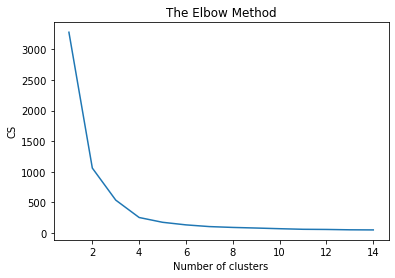

In [10]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

<b> Since the elbow is positioned at 4, the number of clusters would be 4 in this case.

Text(0.5, 1.0, 'K-means Clustering')

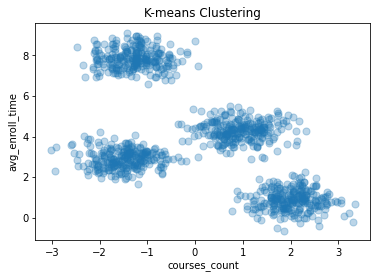

In [11]:
# Resource: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.3);
plt.xlabel("courses_count")
plt.ylabel("avg_enroll_time")
plt.title("K-means Clustering")

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

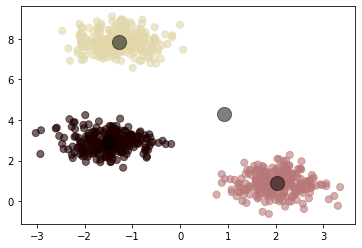

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='pink_r', alpha=0.6)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [14]:
df_clustered = data
demo = pd.DataFrame(data, columns=['courses_count', 'avg_enroll_time'])
df_clustered['cluster'] = kmeans.fit_predict(demo)
df_clustered.head()

,user_id,courses_count,avg_enroll_time,grade,cluster
0,U_8126464,5,21,33,2
1,U_8650752,5,9,77,1
2,U_131074,6,17,98,2
3,U_262145,4,15,76,1
4,U_1441801,5,16,88,2


In [15]:
from collections import Counter
Counter_dict = Counter(kmeans.labels_)
Counter_dict

Counter({2: 23716, 1: 19288, 3: 3676, 0: 1960})

In [16]:
pd.DataFrame(Counter_dict.items(), columns=['Cluster', 'Data_points_count'])

,Cluster,Data_points_count
0,2,23716
1,1,19288
2,3,3676
3,0,1960


In [17]:
# Get average value for two features to group by clusters
df_result = df_clustered.groupby('cluster').mean()
df_result

,courses_count,avg_enroll_time,grade
cluster,,,
0,22.280612,15.485714,49.063776
1,5.831968,11.528463,49.498859
2,5.904158,19.704419,49.658501
3,6.559304,1.676823,49.096844


## 2.3 Interpretation of Clustering Result

### 2.3.1 Courses Count Summary

In [18]:
# Analyze avg_watching count
print("Min Courses Count: {}".format(data['courses_count'].min()))
print("Max Courses Count: {}".format(data['courses_count'].max()))
print("Median Courses Count: {}".format(data['courses_count'].median()))
print("SD Courses Count: {}".format(data['courses_count'].std()))
print("Mean Courses Count: {}".format(data['courses_count'].mean()))

Min Courses Count: 4
Max Courses Count: 161
Median Courses Count: 5.0
SD Courses Count: 4.578185778890625
Mean Courses Count: 6.584950657894737


<AxesSubplot:xlabel='courses_count', ylabel='Count'>

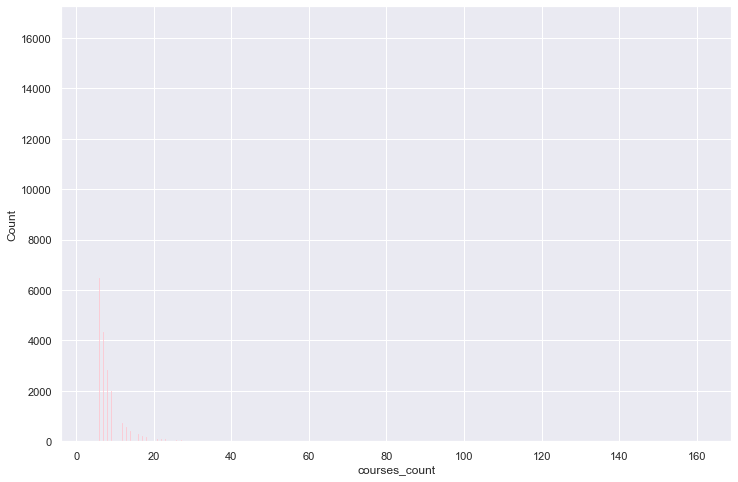

In [19]:
# Histogram
sns.set(rc={"figure.figsize":(12, 8)})
sns.histplot(data=data, x="courses_count", color = "pink")

<AxesSubplot:xlabel='courses_count'>

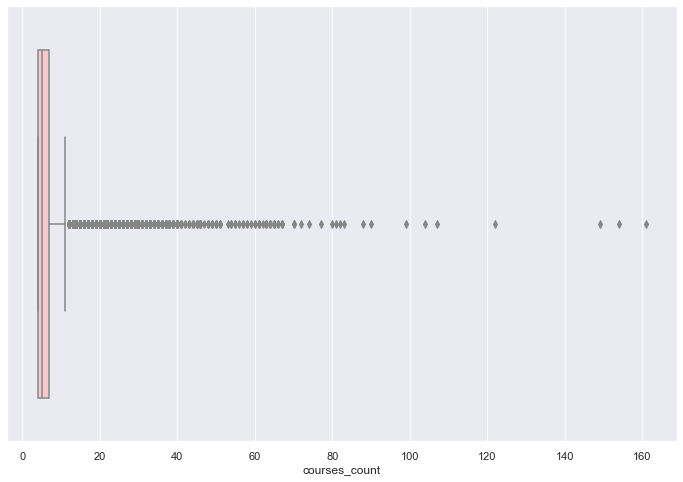

In [20]:
# Boxplot
sns.boxplot(x=data["courses_count"], color = "pink")

### 2.3.2 Average Enroll Time Summary
 Max Enroll Time should not exceed 23 because there are only 0 o'clock to 23 o'clock.

In [21]:
# Analyze avg_watching count
print("Min Enroll Time: {}".format(data['avg_enroll_time'].min()))
print("Max Enroll Time: {}".format(data['avg_enroll_time'].max()))
print("Median Enroll Time: {}".format(data['avg_enroll_time'].median()))
print("SD Enroll Time: {}".format(data['avg_enroll_time'].std()))
print("Mean Enroll Time: {}".format(data['avg_enroll_time'].mean()))

Min Enroll Time: 0
Max Enroll Time: 23
Median Enroll Time: 16.0
SD Enroll Time: 5.935554988611625
Mean Enroll Time: 14.929831414473684


<AxesSubplot:xlabel='avg_enroll_time', ylabel='Count'>

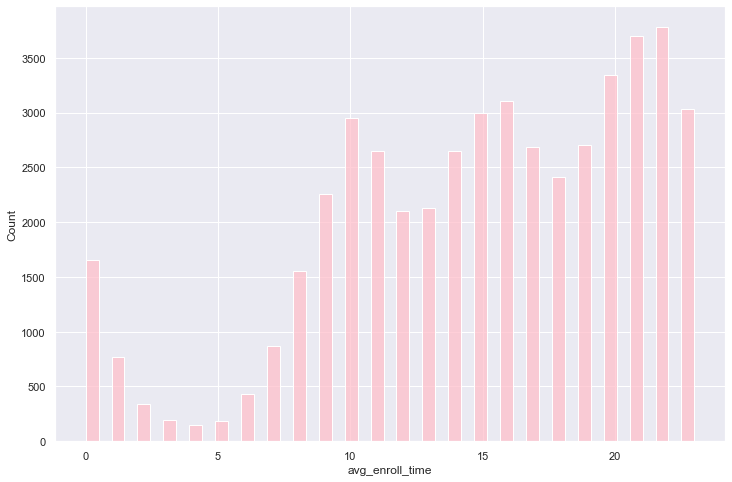

In [22]:
# Histogram
sns.histplot(data=data, x="avg_enroll_time", color = "Pink")

<AxesSubplot:xlabel='avg_enroll_time'>

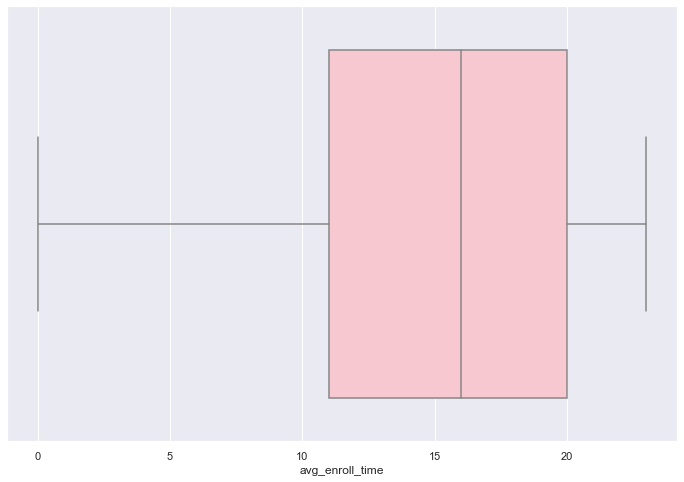

In [23]:
# Boxplot
sns.boxplot(x=data["avg_enroll_time"], color = "pink")

### 2.3.3 Grade Summary

In [24]:
# Analyze grade
print("Min Grade: {}".format(data['grade'].min()))
print("Max Grade: {}".format(data['grade'].max()))
print("Median Grade: {}".format(data['grade'].median()))
print("SD Grade: {}".format(data['grade'].std()))
print("Mean Grade: {}".format(data['grade'].mean()))

Min Grade: 0
Max Grade: 99
Median Grade: 50.0
SD Grade: 28.79706637069079
Mean Grade: 49.52878289473684


<AxesSubplot:xlabel='grade', ylabel='Count'>

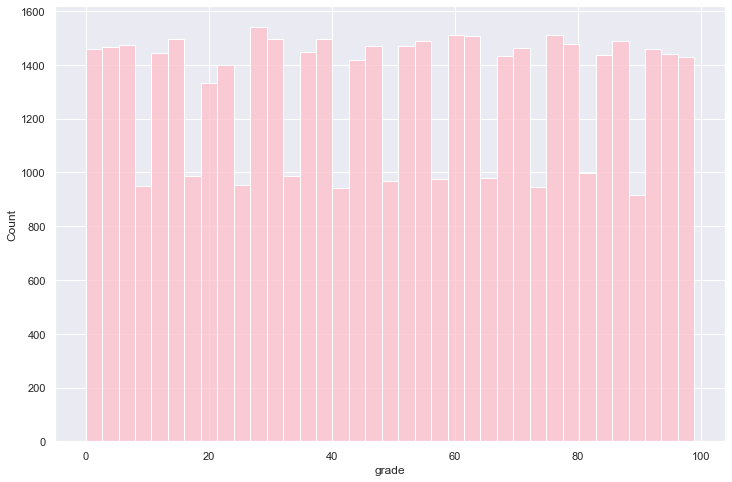

In [25]:
# Histogram
sns.histplot(data=data, x="grade", color = "Pink")

<AxesSubplot:xlabel='grade'>

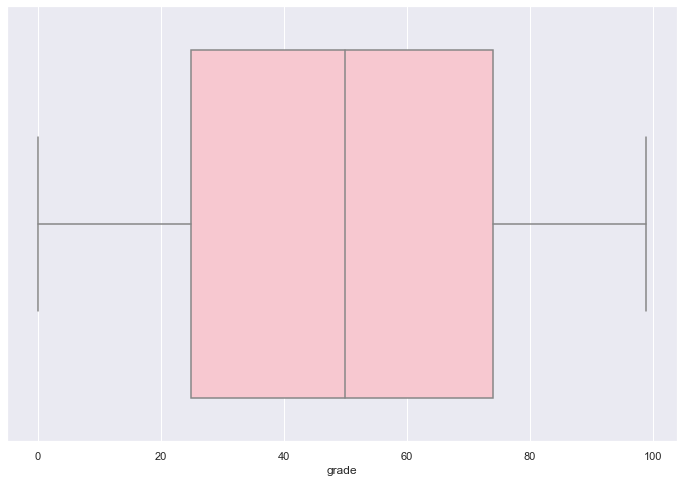

In [26]:
# Boxplot
sns.boxplot(x=data["grade"], color = "pink")

# 3. Fuzzy Inference System
## 3.1 Membership Function Formulation
Resource: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [27]:
pip install -U scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [29]:
# New Antecedent/Consequent objects hold universe variables and membership functions
courses_count = ctrl.Antecedent(np.arange(0, 100, 1), 'courses_count')
avg_enroll_time = ctrl.Antecedent(np.arange(0, 23, 1), 'avg_enroll_time')
performance = ctrl.Consequent(np.arange(0, 101, 1), 'performance')

# Auto-membership function population is possible with .automf(3, 5, or 7)
# However, according to clustering, we need 4. Therefore, specific names must be given.
courses_count.automf(4, names=['Less', 'Medium', 'Many', 'Very Many'])
avg_enroll_time.automf(4, names=['Morning', 'Afternoon', 'Evening', 'Late Night'])


# Custom membership functions can be built interactively with a familiar,
# Pythonic API
performance['Bad'] = fuzz.trimf(performance.universe, [0, 0, 20])
performance['Average'] = fuzz.trimf(performance.universe, [0, 20, 75])
performance['Good'] = fuzz.trimf(performance.universe, [20, 75, 90])
performance['Excellent'] = fuzz.trimf(performance.universe, [75, 100, 100])

## 3.2 Membership Functions Visualization
### 3.2.1 Courses Count

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


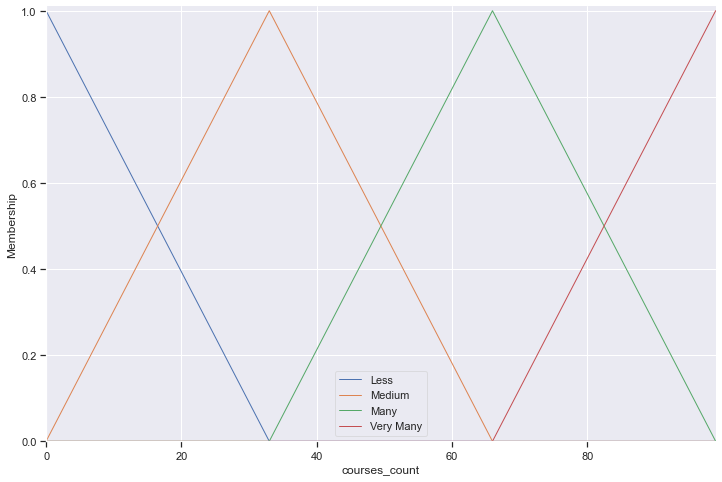

In [30]:
# You can see how these look with .view()
courses_count.view()

### 3.2.2 Average Enroll Time

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


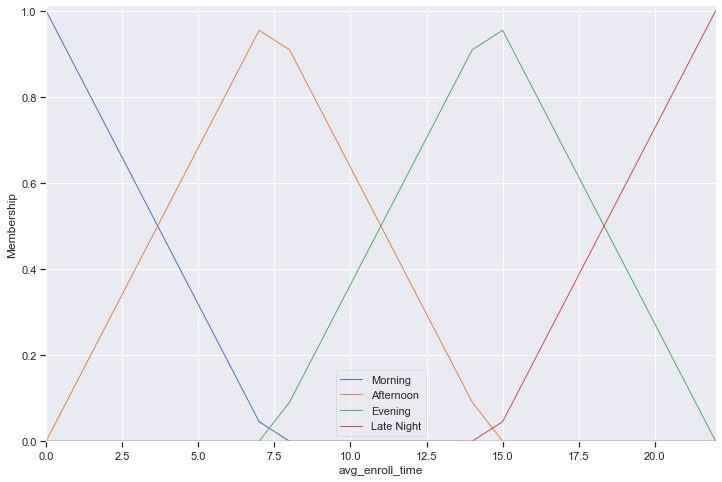

In [31]:
avg_enroll_time.view()

### 3.2.3 Student Performance

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


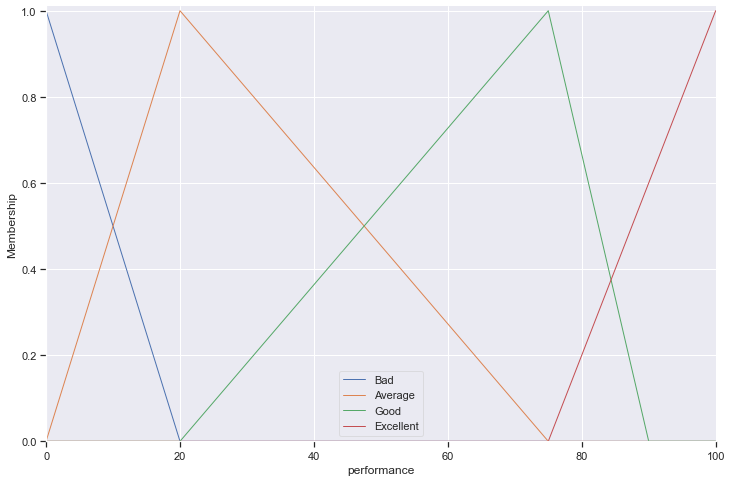

In [32]:
performance.view()

## 3.3 Fuzzy Rules Setting

In [33]:
rule1 = ctrl.Rule(courses_count['Less'] & avg_enroll_time['Morning'], performance['Bad'])
rule2 = ctrl.Rule(courses_count['Medium'] | avg_enroll_time['Afternoon'], performance['Average'])
rule3 = ctrl.Rule(courses_count['Many'] | avg_enroll_time['Evening'], performance['Good'])
rule4 = ctrl.Rule(courses_count['Very Many'] | avg_enroll_time['Late Night'], performance['Excellent'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [34]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# 4 Demonstration

Expected Grade = 45.60256410256411


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


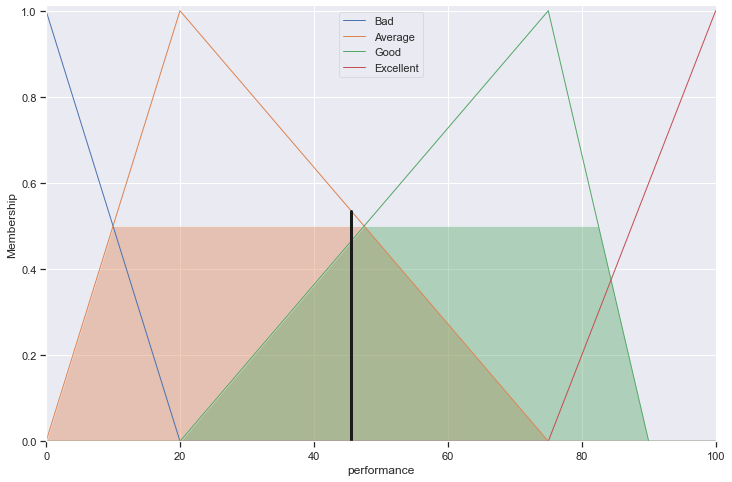

In [35]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API

# Your Input
    # courses_count = 0 ~ 100
    # Completion_perct = 0 ~ 100
tipping.input['courses_count'] = 5
tipping.input['avg_enroll_time'] = 11

# Crunch the numbers
tipping.compute()

print("Expected Grade = {}".format(tipping.output['performance']))
performance.view(sim=tipping)